# Project Checkpoint

**Araynah Dover**
**Section 05**

## Research Questions: 

* How might changes in Arctic sea ice extent affect global weather patterns over the next 50 years?

* How do the distribution and movement of galaxies change over time, and what does this tell us about the expansion of the universe

### Resources that I will use:
* Some resources that I will Potentially use are National Snow and Ice Data Center (NSIDC), NOAA Climate Data: which gives data on different temperature, and NASA’s Earth System Model (ESM) which provides different climate visualizations

* Sloan Digital Sky Survey (SDSS) Datasets: which provides he SDSS provides a wealth of data on galaxy positions, redshifts
* Hubble Space Telescope (HST) Datasets, Galaxy Redshift Survey Data

https://skyserver.sdss.org/dr1/en/help/download/
https://earthdata.nasa.gov/

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Read in file contents

exo = pd.read_csv('exo.csv')

# Created a new Data Frame for Just the needed Variables

# Used the drop_duplicates w/subset to combine those columns

drop_exo = exo.drop_duplicates(subset=['Planet Host', 'Stellar Mass','Stellar Radius'])

# Used loc to parse all needed rows with specific columns

df = drop_exo.loc[:, ['Planet Name', 'Planet Host', 'Num Planets', 'Stellar Mass',
                      'Stellar Radius','Stellar Effective Temperature','Orbit Semi-Major Axis','Spectral Type'
                     ]
                 ]
df

,Planet Name,Planet Host,Num Planets,Stellar Mass,Stellar Radius,Stellar Effective Temperature,Orbit Semi-Major Axis,Spectral Type
0,11 Com b,11 Com,1,2.70,19.00,4742.00,1.290000,G8 III
1,11 UMi b,11 UMi,1,2.78,29.79,4213.00,1.530000,NaN
2,14 And b,14 And,1,2.20,11.00,4813.00,0.830000,K0 III
3,14 Her b,14 Her,2,0.90,0.93,5338.00,2.930000,NaN
4,16 Cyg B b,16 Cyg B,1,1.08,1.13,5750.00,1.660000,NaN
...,...,...,...,...,...,...,...,...
4565,tau Boo b,tau Boo,1,1.32,1.43,6466.27,0.049000,NaN
4566,tau Cet e,tau Cet,4,0.78,NaN,NaN,0.538000,NaN
4570,tau Gem b,tau Gem,1,2.30,26.80,4388.00,1.170000,K2 III
4571,ups And b,ups And,3,1.30,1.56,NaN,0.059222,F8 V


In [100]:
# Compute the Stellar mass in expo form (kg)

mass_sun = 1.989 * pow(10,30)   # Mass of Sun (kg)

# New list for converted mass

stellar_mass = []

# For loop to loop through masses and convert masses

for star in df['Stellar Mass']:
    
    stellar_mass.append(star * mass_sun)

# Add the converted masses as a new column

df['Stellar Mass (kg)'] = stellar_mass

df

,Planet Name,Planet Host,Num Planets,Stellar Mass,Stellar Radius,Stellar Effective Temperature,Orbit Semi-Major Axis,Spectral Type,Luminosity,Habitable Zone Inner,Habitable Zone Outer,In Habitable Zone,Stellar Mass (kg)
0,11 Com b,11 Com,1,2.70,19.00,4742.00,1.290000,G8 III,163.773357,12.157527,17.532433,False,5.370300e+30
1,11 UMi b,11 UMi,1,2.78,29.79,4213.00,1.530000,NaN,250.839943,15.046031,21.697960,False,5.529420e+30
2,14 And b,14 And,1,2.20,11.00,4813.00,0.830000,K0 III,58.255732,7.250917,10.456586,False,4.375800e+30
3,14 Her b,14 Her,2,0.90,0.93,5338.00,2.930000,NaN,0.630043,0.754065,1.087441,False,1.790100e+30
4,16 Cyg B b,16 Cyg B,1,1.08,1.13,5750.00,1.660000,NaN,1.252328,1.063121,1.533132,False,2.148120e+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,tau Boo b,tau Boo,1,1.32,1.43,6466.27,0.049000,NaN,3.207578,1.701423,2.453631,False,2.625480e+30
4566,tau Cet e,tau Cet,4,0.78,NaN,NaN,0.538000,NaN,NaN,NaN,NaN,False,1.551420e+30
4570,tau Gem b,tau Gem,1,2.30,26.80,4388.00,1.170000,K2 III,238.905371,14.683736,21.175493,False,4.574700e+30
4571,ups And b,ups And,3,1.30,1.56,NaN,0.059222,F8 V,NaN,NaN,NaN,False,2.585700e+30


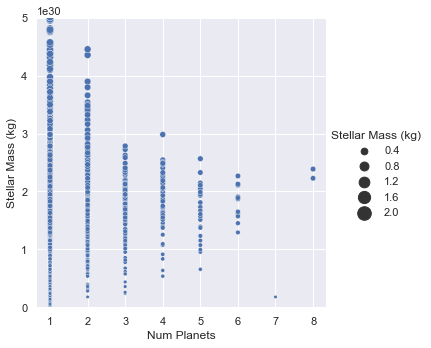

In [103]:
sns.set_theme(style="darkgrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df, x="Num Planets",y="Stellar Mass (kg)",
    size="Stellar Mass (kg)",
    palette=cmap, sizes=(10, 200),
)
#g.set(yscale="log")
plt.ylim(0, 5e30)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

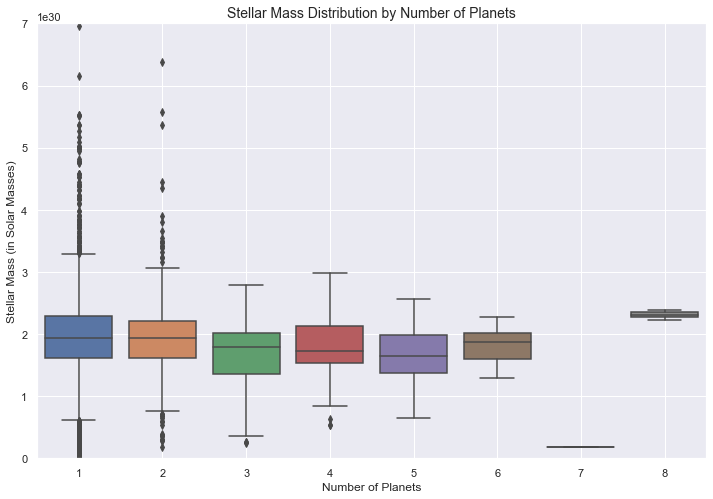

In [77]:
# Zoombed in Version
plt.figure(figsize=(12, 8))
sns.boxplot(x='Num Planets', y='Stellar Mass (kg)', data=df)
plt.title('Stellar Mass Distribution by Number of Planets', fontsize=14)
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Stellar Mass (in Solar Masses)', fontsize=12)
plt.ylim(0, 7e30)
plt.grid(True)
plt.show()

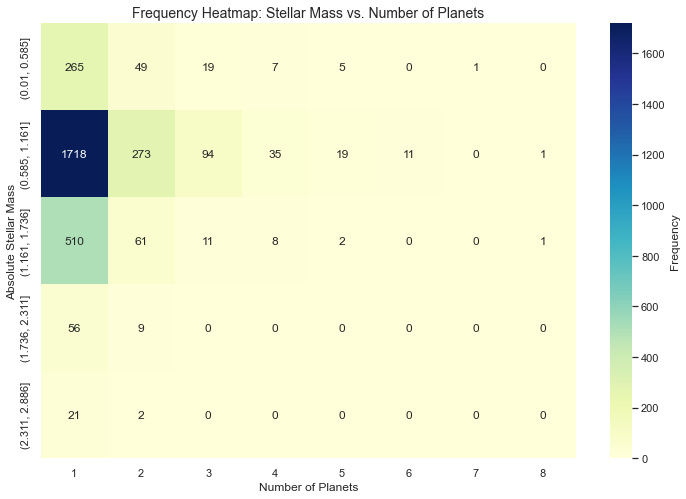

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins for stellar mass
bins = np.linspace(df['Stellar Mass'].min(), df['Stellar Mass'].max(), 20)  # 20 bins
df['Stellar Mass Bins'] = pd.cut(df['Stellar Mass'], bins=bins)
heatmap_data = pd.crosstab(df['Stellar Mass Bins'], df['Num Planets'])

heatmap_data = heatmap_data.iloc[:5]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Frequency Heatmap: Stellar Mass vs. Number of Planets', fontsize=14)
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Absolute Stellar Mass', fontsize=12)
plt.show()

In [108]:
# Calculate habitable zone boundaries 

df['Luminosity'] = (df['Stellar Radius']**2) * (df['Stellar Effective Temperature']/5778)**4  # 5778 K is the Sun's temperature
df['Habitable Zone Inner'] = 0.95 * (df['Luminosity']**0.5)
df['Habitable Zone Outer'] = 1.37 * (df['Luminosity']**0.5)

# Check if planets are in the habitable zone

df['In Habitable Zone'] = (df['Orbit Semi-Major Axis'] >= df['Habitable Zone Inner']) & (df['Orbit Semi-Major Axis'] <= df['Habitable Zone Outer'])

# Visualize habitable zone planets by spectral type

habitable_planets = df[df['In Habitable Zone']]

# Display the filtered DataFrame
habitable_planets

,Planet Name,Planet Host,Num Planets,Stellar Mass,Stellar Radius,Stellar Effective Temperature,Orbit Semi-Major Axis,Spectral Type,Luminosity,Habitable Zone Inner,Habitable Zone Outer,In Habitable Zone,Stellar Mass (kg),Stellar Mass Bins
47,BD+14 4559 b,BD+14 4559,1,0.49,0.86,4864.00,0.78000,NaN,0.371416,0.578967,0.834932,True,9.746100e+29,"(0.01, 0.585]"
204,GJ 3293 b,GJ 3293,4,0.42,0.40,3466.00,0.14339,M2.5,0.020717,0.136737,0.197189,True,8.353800e+29,"(0.01, 0.585]"
428,HD 100777 b,HD 100777,1,0.83,1.04,5533.00,1.03000,NaN,0.909493,0.905990,1.306532,True,1.650870e+30,"(0.585, 1.161]"
458,HD 10697 b,HD 10697,1,1.13,1.79,5600.00,2.14000,NaN,2.827145,1.597341,2.303534,True,2.247570e+30,"(0.585, 1.161]"
469,HD 108874 b,HD 108874,2,1.10,1.05,5600.00,1.04000,NaN,0.972793,0.936988,1.351235,True,2.187900e+30,"(0.585, 1.161]"
474,HD 109286 b,HD 109286,1,0.98,1.09,5694.00,1.25900,G4 V,1.120502,1.005611,1.450197,True,1.949220e+30,"(0.585, 1.161]"
482,HD 111998 b,HD 111998,1,1.18,1.45,6557.00,1.82000,F5 V,3.486957,1.773973,2.558255,True,2.347020e+30,"(1.161, 1.736]"
512,HD 125612 b,HD 125612,3,1.11,1.05,5841.00,1.37200,G3 V,1.151376,1.019371,1.470040,True,2.207790e+30,"(0.585, 1.161]"
543,HD 137388 b,HD 137388,1,0.68,0.88,5181.00,0.89000,NaN,0.500622,0.672169,0.969338,True,1.352520e+30,"(0.585, 1.161]"
564,HD 142415 b,HD 142415,1,1.07,1.04,5940.00,1.06000,NaN,1.208098,1.044179,1.505815,True,2.128230e+30,"(0.585, 1.161]"
